In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/deniss/qwerty/programming for datascience project/redfin_properties_all_cities.csv')
df.head(5)

,City,Price,Beds,Baths,Sqft,Address,Link
0,Florida,"$799,000",— beds,14306 baths,"1,650 sq ft","7152/7154 SW 22nd St, Miami, FL 33155",NaN
1,Florida,"$589,950",3 beds,2.5 baths,"1,677 sq ft","16306 SW 100th Ter, Miami, FL 33196",NaN
2,Florida,NaN,NaN,NaN,NaN,NaN,NaN
3,Florida,"$485,000",2 beds,2.5 baths,"1,755 sq ft","1456 SW 134th Pl, Miami, FL 33184",NaN
4,Florida,"$552,000",1 bed,1.5 baths,776 sq ft,"55 SW 9th St #1510, Miami, FL 33130",NaN


In [4]:
df.tail(5)

,City,Price,Beds,Baths,Sqft,Address,Link
8755,FLorida,"$599,000",5 beds,3.5 baths,"3,822 sq ft","10707 Pegasus Valley Ct, Tampa, FL 33647",NaN
8756,FLorida,"$339,900",3 beds,2 baths,"1,252 sq ft","4418 Pine Meadow Ct, Tampa, FL 33624",NaN
8757,FLorida,"$1,090,000",3 beds,2 baths,"2,027 sq ft","115 S Beverly Ave, Tampa, FL 33609",NaN
8758,FLorida,"$349,999",4 beds,2 baths,"1,255 sq ft","2408 Wishing Well Way, Tampa, FL 33619",NaN
8759,FLorida,"$389,900",3 beds,2 baths,"1,129 sq ft","1713 W Saint John St, Tampa, FL 33607",NaN


In [5]:
df.drop(columns=["Link", "Address"], inplace=True)


In [6]:
df

,City,Price,Beds,Baths,Sqft
0,Florida,"$799,000",— beds,14306 baths,"1,650 sq ft"
1,Florida,"$589,950",3 beds,2.5 baths,"1,677 sq ft"
2,Florida,NaN,NaN,NaN,NaN
3,Florida,"$485,000",2 beds,2.5 baths,"1,755 sq ft"
4,Florida,"$552,000",1 bed,1.5 baths,776 sq ft
...,...,...,...,...,...
8755,FLorida,"$599,000",5 beds,3.5 baths,"3,822 sq ft"
8756,FLorida,"$339,900",3 beds,2 baths,"1,252 sq ft"
8757,FLorida,"$1,090,000",3 beds,2 baths,"2,027 sq ft"
8758,FLorida,"$349,999",4 beds,2 baths,"1,255 sq ft"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    8760 non-null   object
 1   Price   8162 non-null   object
 2   Beds    8162 non-null   object
 3   Baths   8162 non-null   object
 4   Sqft    8162 non-null   object
dtypes: object(5)
memory usage: 342.3+ KB


In [8]:
df.isnull().sum()

City       0
Price    598
Beds     598
Baths    598
Sqft     598
dtype: int64

In [9]:
df.notnull().sum()


City     8760
Price    8162
Beds     8162
Baths    8162
Sqft     8162
dtype: int64

In [10]:
df.head()

,City,Price,Beds,Baths,Sqft
0,Florida,"$799,000",— beds,14306 baths,"1,650 sq ft"
1,Florida,"$589,950",3 beds,2.5 baths,"1,677 sq ft"
2,Florida,NaN,NaN,NaN,NaN
3,Florida,"$485,000",2 beds,2.5 baths,"1,755 sq ft"
4,Florida,"$552,000",1 bed,1.5 baths,776 sq ft


In [11]:
df.dropna(subset=['City', 'Price', 'Beds', 'Baths'], inplace=True)

In [12]:
df.isnull().sum()

City     0
Price    0
Beds     0
Baths    0
Sqft     0
dtype: int64

In [13]:
df.head()

,City,Price,Beds,Baths,Sqft
0,Florida,"$799,000",— beds,14306 baths,"1,650 sq ft"
1,Florida,"$589,950",3 beds,2.5 baths,"1,677 sq ft"
3,Florida,"$485,000",2 beds,2.5 baths,"1,755 sq ft"
4,Florida,"$552,000",1 bed,1.5 baths,776 sq ft
5,Florida,"$580,000",4 beds,2 baths,"1,584 sq ft"


# Data Visualization

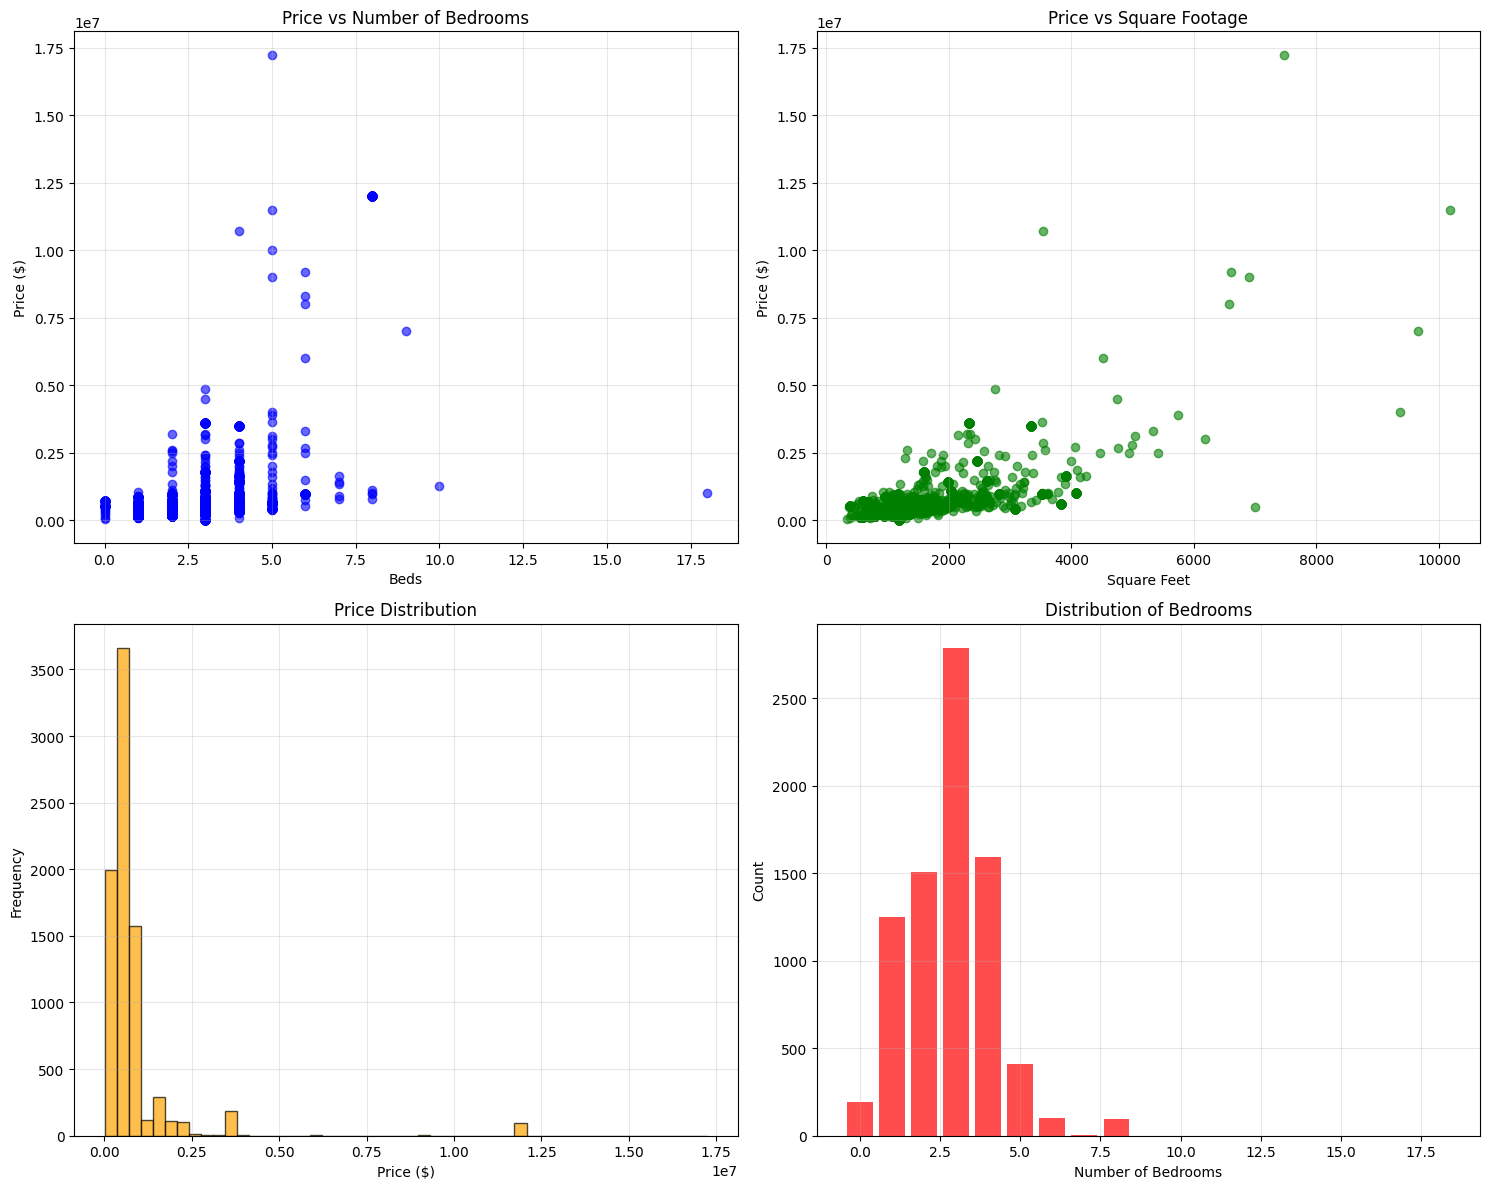

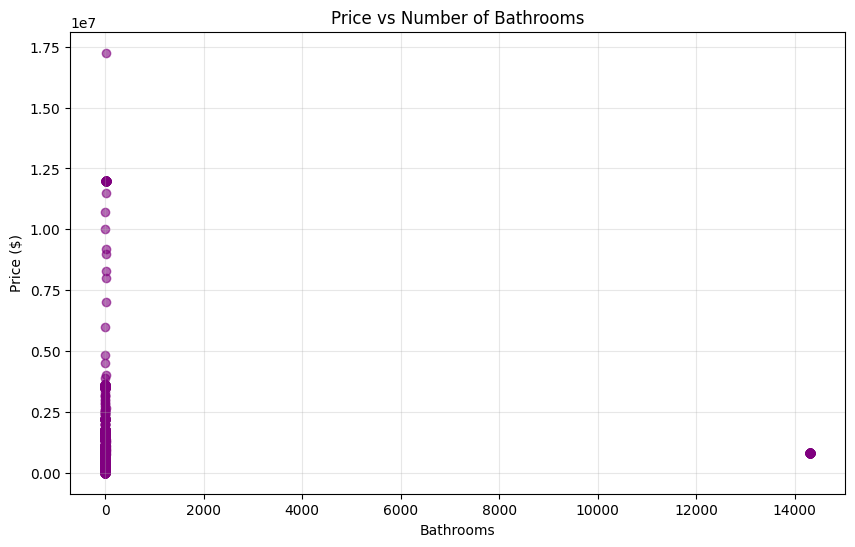

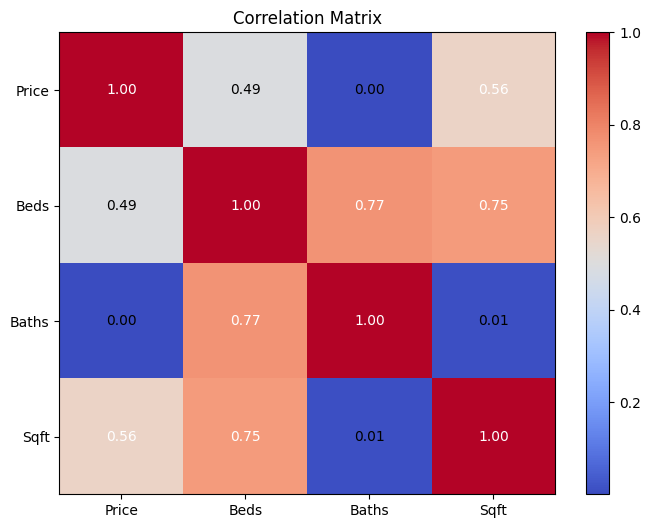

In [34]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Price vs Beds scatter plot
axes[0, 0].scatter(df['Beds'], df['Price'], alpha=0.6, color='blue')
axes[0, 0].set_title('Price vs Number of Bedrooms')
axes[0, 0].set_xlabel('Beds')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Price vs Square Footage scatter plot
axes[0, 1].scatter(df['Sqft'], df['Price'], alpha=0.6, color='green')
axes[0, 1].set_title('Price vs Square Footage')
axes[0, 1].set_xlabel('Square Feet')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Price distribution histogram
axes[1, 0].hist(df['Price'].dropna(), bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Price Distribution')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Beds distribution
bed_counts = df['Beds'].value_counts().sort_index()
axes[1, 1].bar(bed_counts.index, bed_counts.values, alpha=0.7, color='red')
axes[1, 1].set_title('Distribution of Bedrooms')
axes[1, 1].set_xlabel('Number of Bedrooms')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Price vs Bathrooms
plt.figure(figsize=(10, 6))
plt.scatter(df['Baths'], df['Price'], alpha=0.6, color='purple')
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Price', 'Beds', 'Baths', 'Sqft']].corr()
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(im)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add correlation values to the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

plt.show()

In [15]:

def clean_price(price_str):
    if pd.isna(price_str):
        return np.nan
    clean_str = str(price_str).replace('$', '').replace(',', '').strip()
    try:
        return float(clean_str)
    except:
        return np.nan


def clean_beds(beds_str):
    if pd.isna(beds_str):
        return np.nan
    import re
    match = re.search(r'\d+', str(beds_str))
    if match:
        return float(match.group())
    return np.nan

def clean_baths(baths_str):
    if pd.isna(baths_str):
        return np.nan

    import re
    match = re.search(r'\d+\.?\d*', str(baths_str))
    if match:
        return float(match.group())
    return np.nan

def clean_sqft(sqft_str):
    if pd.isna(sqft_str):
        return np.nan
    clean_str = str(sqft_str).replace('sqft', '').replace(',', '').strip()
    import re
    match = re.search(r'\d+', clean_str)
    if match:
        return float(match.group())
    return np.nan

df['Price'] = df['Price'].apply(clean_price)
df['Beds'] = df['Beds'].apply(clean_beds)
df['Baths'] = df['Baths'].apply(clean_baths)
df['Sqft'] = df['Sqft'].apply(clean_sqft)

In [16]:
df.head()

,City,Price,Beds,Baths,Sqft
0,Florida,799000.0,NaN,14306.0,1650.0
1,Florida,589950.0,3.0,2.5,1677.0
3,Florida,485000.0,2.0,2.5,1755.0
4,Florida,552000.0,1.0,1.5,776.0
5,Florida,580000.0,4.0,2.0,1584.0


In [17]:
df_clean = df.dropna(subset=['Beds', 'Baths', 'Sqft', 'Price'])
print(f"Rows after cleaning: {len(df_clean)} (removed {len(df) - len(df_clean)} rows)")


Rows after cleaning: 7848 (removed 314 rows)


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7848 entries, 1 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    7848 non-null   object 
 1   Price   7848 non-null   float64
 2   Beds    7848 non-null   float64
 3   Baths   7848 non-null   float64
 4   Sqft    7848 non-null   float64
dtypes: float64(4), object(1)
memory usage: 367.9+ KB


In [19]:
x = df[['Beds', 'Baths', 'Sqft']]
y = df['Price']



In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=168)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6529, 3) (1633, 3) (6529,) (1633,)


In [21]:
x_train.isnull().sum()

Beds     171
Baths     95
Sqft      99
dtype: int64

In [22]:
x_train.dropna(subset=['Beds', 'Baths', 'Sqft'], inplace=True)

In [23]:
x_train

,Beds,Baths,Sqft
878,2.0,2.0,1535.0
7991,1.0,1.0,552.0
7157,2.0,2.0,1302.0
2606,1.0,1.0,752.0
6509,3.0,2.5,2234.0
...,...,...,...
3769,4.0,2.0,1584.0
2522,0.0,1.0,388.0
3633,3.0,2.5,1677.0
5769,4.0,2.0,2070.0


In [24]:
def scale(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) / std, mean, std

x_train, mean, std = scale(x_train)
x_test = (x_test - mean) / std
x_train

,Beds,Baths,Sqft
878,-0.613068,-0.199320,-0.055738
7991,-1.404014,-1.354606,-1.255523
7157,-0.613068,-0.199320,-0.340122
2606,-1.404014,-1.354606,-1.011416
6509,0.177878,0.378322,0.797416
...,...,...,...
3769,0.968824,-0.199320,0.004069
2522,-2.194960,-1.354606,-1.455691
3633,0.177878,0.378322,0.117578
5769,0.968824,-0.199320,0.597248


In [25]:
x_train.dropna(inplace=True)

In [26]:
x_train

,Beds,Baths,Sqft
878,-0.613068,-0.199320,-0.055738
7991,-1.404014,-1.354606,-1.255523
7157,-0.613068,-0.199320,-0.340122
2606,-1.404014,-1.354606,-1.011416
6509,0.177878,0.378322,0.797416
...,...,...,...
3769,0.968824,-0.199320,0.004069
2522,-2.194960,-1.354606,-1.455691
3633,0.177878,0.378322,0.117578
5769,0.968824,-0.199320,0.597248


In [27]:
y_train

878     445000.0
7991     99900.0
7157    259000.0
2606    440000.0
6509    674900.0
          ...   
3769    580000.0
2522    519900.0
3633    589950.0
5769    609900.0
6274    449900.0
Name: Price, Length: 6529, dtype: float64

In [28]:
y_test

8497    609900.0
6568    185000.0
3217    775000.0
6292    339900.0
197     760000.0
          ...   
8758    349999.0
2452    455000.0
1336    550000.0
4501    360000.0
3842    519900.0
Name: Price, Length: 1633, dtype: float64

In [29]:
# Convert array to tensor
import torch

tX_train = torch.tensor(x_train.values, dtype=torch.float32)
ty_train = torch.tensor(y_train.values, dtype=torch.float32)
tX_test = torch.tensor(x_test.values, dtype=torch.float32)
ty_test = torch.tensor(y_test.values, dtype=torch.float32)
print(tX_train.shape)
print(ty_train.shape)
print(tX_test.shape)
print(ty_test.shape)

torch.Size([6283, 3])
torch.Size([6529])
torch.Size([1633, 3])
torch.Size([1633])


In [30]:
import torch.optim as optim

def Model(x, W1, b1, W2, b2, W3, b3):
  # layer1
  Z1 = torch.matmul(x, W1) + b1
  A1 = torch.sigmoid(Z1)

  # layer2
  Z2 = torch.matmul(A1, W2) + b2
  A2 = torch.sigmoid(Z2)

  # layer3
  Z3 = torch.matmul(A2, W3) + b3
  output = torch.sigmoid(Z3)

  return output

import torch.nn as nn

# initialize param
W1 = torch.randn((3, 5), dtype=torch.float32, requires_grad=True)
b1 = torch.randn((1, 5), dtype=torch.float32, requires_grad=True)
W2 = torch.randn((5, 5), dtype=torch.float32, requires_grad=True)
b2 = torch.randn((1, 5), dtype=torch.float32, requires_grad=True)
W3 = torch.randn((5, 1), dtype=torch.float32, requires_grad=True)
b3 = torch.randn((1, 1), dtype=torch.float32, requires_grad=True)

cost_func2 = nn.BCELoss()
optimizer2 = optim.SGD([W1, b1, W2, b2, W3, b3], lr=6)

valid_indices = x_train.index

# Align y_train with the same indices
y_train_aligned = y_train.loc[valid_indices]
y_test_aligned = y_test.loc[x_test.index]


for i in range(20000):
  h = Model(tX_train, W1, b1, W2, b2, W3, b3)
  price_threshold = torch.median(torch.tensor(y_train_aligned.values, dtype=torch.float32))
  ty_train_binary = (torch.tensor(y_train_aligned.values, dtype=torch.float32) > price_threshold).float().view(-1, 1)
  cost = cost_func2(h, ty_train_binary)
  cost.backward()
  optimizer2.step()
  optimizer2.zero_grad()
  if (i + 1) % 10 == 0:
    print(f'Epoch: {i+1:03d}, Cost: {cost.item():.4f}')

Epoch: 010, Cost: 0.5552
Epoch: 020, Cost: 0.5238
Epoch: 030, Cost: 0.5171
Epoch: 040, Cost: 0.5153
Epoch: 050, Cost: 0.5141
Epoch: 060, Cost: 0.5131
Epoch: 070, Cost: 0.5123
Epoch: 080, Cost: 0.5116
Epoch: 090, Cost: 0.5109
Epoch: 100, Cost: 0.5103
Epoch: 110, Cost: 0.5096
Epoch: 120, Cost: 0.5089
Epoch: 130, Cost: 0.5081
Epoch: 140, Cost: 0.5070
Epoch: 150, Cost: 0.5057
Epoch: 160, Cost: 0.5040
Epoch: 170, Cost: 0.5015
Epoch: 180, Cost: 0.4981
Epoch: 190, Cost: 0.4936
Epoch: 200, Cost: 0.4882
Epoch: 210, Cost: 0.4825
Epoch: 220, Cost: 0.4770
Epoch: 230, Cost: 0.4731
Epoch: 240, Cost: 0.4756
Epoch: 250, Cost: 0.4904
Epoch: 260, Cost: 0.4803
Epoch: 270, Cost: 0.4749
Epoch: 280, Cost: 0.4697
Epoch: 290, Cost: 0.4646
Epoch: 300, Cost: 0.4595
Epoch: 310, Cost: 0.4546
Epoch: 320, Cost: 0.4501
Epoch: 330, Cost: 0.4463
Epoch: 340, Cost: 0.4434
Epoch: 350, Cost: 0.4413
Epoch: 360, Cost: 0.4399
Epoch: 370, Cost: 0.4391
Epoch: 380, Cost: 0.4387
Epoch: 390, Cost: 0.4385
Epoch: 400, Cost: 0.4382


In [31]:
# evaluate model 
h = Model(tX_test, W1, b1, W2, b2, W3, b3)
h = h.reshape(-1,)
ty_test_binary = (ty_test > price_threshold).float()

y_pred = torch.zeros_like(ty_test_binary)
y_pred[h >= 0.5] = 1
y_pred[h < 0.5] = 0

TP = ((y_pred == 1) & (ty_test_binary == 1)).int().sum()
FP = ((y_pred == 1) & (ty_test_binary == 0)).int().sum()
FN = ((y_pred == 0) & (ty_test_binary == 1)).int().sum()

Precision2 = TP / (TP + FP) if (TP + FP) > 0 else torch.tensor(0.0)
Recall2 = TP / (TP + FN) if (TP + FN) > 0 else torch.tensor(0.0)
F_score2 = 2 * Precision2 * Recall2 / (Precision2 + Recall2) if (Precision2 + Recall2) > 0 else torch.tensor(0.0)

Accuracy2 = (y_pred == ty_test_binary).int().sum() / len(ty_test_binary)

print(f'Precision: {Precision2:.4f}')
print(f'Recall: {Recall2:.4f}')
print(f'F_score: {F_score2:.4f}')
print(f'Accuracy: {Accuracy2:.4f}')

Precision: 0.8462
Recall: 0.8751
F_score: 0.8605
Accuracy: 0.8524


In [32]:
import joblib 
# Combine weights and biases into a single dictionary and save
housePridePredFlorida = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    'W3': W3,
    'b3': b3
}
joblib.dump(housePridePredFlorida, 'housePridePredFlorida.joblib')

['housePridePredFlorida.joblib']

In [33]:
# Save training statistics for Streamlit app
training_stats = {
    'mean': mean,
    'std': std
}
joblib.dump(training_stats, 'training_stats.joblib')
print("Training statistics saved successfully!")

Training statistics saved successfully!
